## Hyphothesis 2: 
### The alternaive portfolio will have a return >0.0 and will outperform the SPX (SP500) on its 5 worst days in 2019

## Criteria for Alternative Portfolio:
### 5 worst trading days (by daily returns) did not occur from 9/1/2008-12/31/2008 bear market

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import boto3
from botocore.client import Config
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
import random
from time import time
from pandas.plotting import register_matplotlib_converters

os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()


location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
%matplotlib notebook

In [10]:
register_matplotlib_converters()
%matplotlib notebook

In [51]:
df_name_list = ['df_price07_18', 'df_price19', 'df_returns07_18', 'df_returns19']

### import data

In [52]:
df_list = []
for df_name in df_name_list:
    ### BUCKETS & KEYS
    BUCKET_NAME = 'capstonefiu2020-data'
    key_location = 'data/processed'
    file_name = '{}.csv'.format(df_name)
    key_path = key_location + '/' + file_name

    ### ACTIVATE CLIENT
    client = boto3.client('s3', 
                  aws_access_key_id = AWS_ACCESS_KEY_ID,
                   aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


    ### INSTANTIATE DATAFRAME
    csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
    body = csv_obj['Body']
    csv_string = body.read().decode('utf-8')

    df = pd.read_csv(StringIO(csv_string))
    df.index = df['Unnamed: 0']
    df = df.drop('Unnamed: 0', axis=1)
    df.index.names = ['date']


    #df_bidlo.head()
    #### TRANSPOSE DATA FOR EASE OF USE
    df = df.T
    df.index = pd.to_datetime(df.index)
    df_list.append(df)
    print('{} has shape: {}'.format(df_name, df.shape))

df_price07_18 has shape: (3020, 388)
df_price19 has shape: (252, 486)
df_returns07_18 has shape: (3020, 388)
df_returns19 has shape: (252, 486)


In [53]:
df_price18 = abs(df_list[0])
df_price19= abs(df_list[1])
df_returns18 = df_list[2]
df_returns19 = df_list[3]

In [54]:
# df_price19.head()

In [55]:
dfsp = pd.read_csv('data\\external\\SP500_07_20.csv')
dfsp.index = pd.to_datetime(dfsp['Date'])
dfsp = dfsp.drop('Date', axis=1)
dfsp.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2007-01-03,1418.030029,1429.420044,1407.859985,1416.599976,1416.599976,3429160000,-0.001008
2007-01-04,1416.599976,1421.839966,1408.430054,1418.339966,1418.339966,3004460000,0.001228
2007-01-05,1418.339966,1418.339966,1405.750000,1409.709961,1409.709961,2919400000,-0.006085
2007-01-08,1409.260010,1414.979980,1403.969971,1412.839966,1412.839966,2763340000,0.002540
2007-01-09,1412.839966,1415.609985,1405.420044,1412.109985,1412.109985,3038380000,-0.000517


In [56]:
older_companies = df_price18.columns
newer_companies = df_price19.columns

In [57]:
older_companies[0].split('_')[0]

'ORCL'

In [58]:
### companies that traded from 2007-2019
full_companies = []
for key in older_companies:
    if key in newer_companies:
        full_companies.append(key)

print(len(full_companies))

376


### Find the dates of the worst trading days systemically & by the company

In [59]:
dates = df_price19.index
#df_returns.columns[:5]

#### RETURNS: 5 worst Return dates: S&P (2007-2018)

In [60]:
worst_dates_sp18 = pd.to_datetime(['2008-10-15', '2008-09-29', '2008-12-01', '2008-10-09', '2008-11-20'])
worst_dates_sp18

DatetimeIndex(['2008-10-15', '2008-09-29', '2008-12-01', '2008-10-09',
               '2008-11-20'],
              dtype='datetime64[ns]', freq=None)

#### RETURNS: 5 worst Return dates: S&P 2019

In [61]:
dfsp19 = dfsp[(dfsp.index >= '01-01-2019') & (dfsp.index < '01-01-2020')]

In [62]:
worst_dates_sp19 = dfsp19['Return'].sort_values()[:5]

#### RETURNS: 5 worst Return dates: COMPNAY (2007-2018)

In [63]:
worst_days_returns18 = {}
for symbol in full_companies:
    temp_series = df_returns18[symbol].sort_values(ascending=True).iloc[:5]
    worst_days_returns18[symbol] = temp_series
worst_days_returns18['ORCL_ORACLE CORP']

2011-12-21   -0.116558
2008-10-15   -0.098361
2013-03-21   -0.096882
2018-03-20   -0.094321
2013-06-21   -0.092593
Name: ORCL_ORACLE CORP, dtype: float64

#### RETURNS: 5 worst Return dates: COMPNAY (2019)

In [64]:
worst_days_returns19 = {}
for symbol in full_companies:
    temp_series = df_returns19[symbol].sort_values(ascending=True).iloc[:5]
    worst_days_returns19[symbol] = temp_series
worst_days_returns19['ORCL_ORACLE CORP']

2019-09-12   -0.042636
2019-08-05   -0.037249
2019-12-13   -0.034709
2019-08-14   -0.030573
2019-08-23   -0.030269
Name: ORCL_ORACLE CORP, dtype: float64

### generate symbols for control portfolio

### sample symbols for control portfolio

### Return of the SP during 2019

In [75]:
(dfsp[dfsp.index=='2019-12-31']['Close'].values - dfsp[dfsp.index=='2018-12-31']['Close'].values)/dfsp[dfsp.index=='2018-12-31']['Close'].values


array([0.2887807])

In [76]:
worst_dates_sp19

Date
2019-08-23   -0.021971
2019-08-14   -0.018503
2019-08-05   -0.018402
2019-01-03   -0.017669
2019-03-22   -0.015402
Name: Return, dtype: float64

In [ ]:
# random.sample(full_companies, 5)

### generate symbols for alternative portfolio

In [89]:
alt_symbols = []
for symbol in full_companies:
    temp_series = worst_days_returns18[symbol]
    temp_dates = temp_series.index
    temp_val = 0
    for date in temp_dates:
        if (date >= pd.to_datetime('09-01-2008')) and (date <= pd.to_datetime('12-31-2008')):
            temp_val +=1
    if temp_val==0:
        alt_symbols.append(symbol)

In [91]:
len(alt_symbols)

29

### Generate the return of the Alt Portfolio

In [116]:
alt18 = df_price18.loc[:, alt_symbols]
alt19 = df_price19.loc[:, alt_symbols]

In [100]:
alt_close18 = df_price18.loc[:, alt_symbols].loc['2018-12-31', :]
alt_close19 = df_price19.loc[:, alt_symbols].loc['2019-12-31', :]

In [106]:
(sum(alt_close19)-sum(alt_close18))/sum(alt_close18)

0.18401182001819835

### Check for Each of the 5 Dates

In [119]:
dates_back1 = []
for idx in range(1, len(dates)):
    #print(idx)
    dates_back1.append(dates[idx-1])
dates_back1 = pd.to_datetime(dates_back1)

In [124]:
df_day_behind1 = pd.DataFrame(dates_back1, index=dates[1:], columns=['Day Behind 1'])

In [143]:
day_behind_dates = pd.merge(df_day_behind1, worst_days_alt_portfolio19, left_index=True, right_index=True)['Day Behind 1'].values
day_behind_dates

array(['2019-01-02T00:00:00.000000000', '2019-03-21T00:00:00.000000000',
       '2019-08-02T00:00:00.000000000', '2019-08-13T00:00:00.000000000',
       '2019-08-22T00:00:00.000000000'], dtype='datetime64[ns]')

In [151]:
worst_days_alt_portfolio19 = pd.concat([alt19.loc[worst_dates_sp19.index, :], alt19.loc[day_behind_dates, :]]).sort_index()
worst_days_alt_portfolio19

date,MGM_MGM RESORTS INTERNATIONAL,LH_LABORATORY CORP AMERICA HLDGS,IBM_INTERNATIONAL BUSINESS MACHS COR,HSY_HERSHEY CO,KR_KROGER COMPANY,BMY_BRISTOL MYERS SQUIBB CO,WHR_WHIRLPOOL CORP,MAS_MASCO CORP,IFF_INTERNATIONAL FLAVORS & FRAG INC,CLX_CLOROX CO,...,RMD_RESMED INC,VRSN_VERISIGN INC,BBY_BEST BUY COMPANY INC,FFIV_F 5 NETWORKS INC,AKAM_AKAMAI TECHNOLOGIES INC,ACN_ACCENTURE,CNC_CENTENE CORP DEL,NFLX_NETFLIX INC,STX_SEAGATE TECHNOLOGY PLC,IPGP_I P G PHOTONICS CORP
2019-01-02,25.19,126.43000,115.21000,105.44,27.30,52.43,107.92000,29.55,134.58000,151.13000,...,111.77000,147.75999,53.60,161.17999,59.01,140.59000,113.00,267.66000,39.08,114.76
2019-01-03,24.70,123.70000,112.91000,106.24,27.35,45.12,107.56000,29.07,131.25999,152.03000,...,106.48000,142.59000,52.50,154.31000,57.70,135.78999,109.92,271.20001,36.52,108.60
2019-03-21,26.90,156.30000,141.44000,111.50,24.32,48.92,134.00999,39.11,126.46000,158.06000,...,100.97000,185.38000,70.56,155.83000,73.44,168.24001,58.91,377.87000,48.98,153.09
2019-03-22,26.09,154.32001,139.45000,112.00,24.34,48.16,129.03999,38.25,124.69000,158.13000,...,100.14000,181.67000,70.11,152.24001,71.23,165.24001,57.14,361.01001,46.93,144.77
2019-08-02,28.65,164.77000,147.25000,152.11,22.24,45.99,135.58000,39.97,143.82001,156.89999,...,130.28000,209.47000,68.53,139.03999,88.32,193.00999,50.97,318.82999,44.93,118.50
2019-08-05,27.94,159.77000,140.75999,149.12,21.92,45.38,133.16000,38.70,141.47000,155.03000,...,126.90000,200.30000,66.14,134.61000,84.01,185.55000,48.52,307.63000,44.44,118.06
2019-08-13,28.86,166.20000,135.78999,155.36,23.05,46.49,135.70000,39.17,118.71000,158.96001,...,134.99001,208.96001,71.29,131.61000,89.37,192.88000,49.73,312.28000,45.83,121.98
2019-08-14,27.74,163.63000,131.25000,152.42,22.11,45.64,129.82001,37.92,113.00000,157.28999,...,131.14999,201.88000,66.97,127.63000,84.08,186.97000,47.78,299.10999,44.63,116.45
2019-08-22,28.51,167.94000,134.32001,158.38,23.67,47.86,139.28999,40.56,107.80000,159.14999,...,136.03999,205.20000,68.80,129.35001,88.72,196.34000,45.55,296.92999,47.58,124.73
2019-08-23,27.78,165.86000,129.57001,157.03,23.29,46.58,134.55000,38.66,106.50000,155.92999,...,132.17999,200.52000,66.21,124.39000,86.99,192.81000,44.72,291.44000,46.92,118.26


<IPython.core.display.Javascript object>


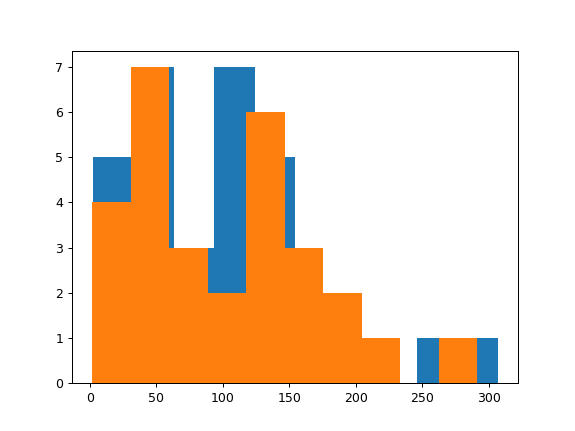

In [222]:
plt.hist(worst_days_alt_portfolio19[worst_days_alt_portfolio19.index=='2019-01-03'])
plt.hist(worst_days_alt_portfolio19[worst_days_alt_portfolio19.index=='2019-08-23'])
plt.show()

### Generate Portfolio Value Day before and Day After, Generate Aggregate Returns

In [155]:
portfolio_values_worst_days19 = worst_days_alt_portfolio19.apply(sum, axis=1)

In [217]:
comparison_dic = {}
idx=0
for i in range(10):
    if i % 2 == 0:
        pass
    else:
        temp_idx = portfolio_values_worst_days19.index[i]
        temp_sp = worst_dates_sp19[worst_dates_sp19.index==temp_idx].values[0]
        temp_start = portfolio_values_worst_days19[i-1]
        temp_end = portfolio_values_worst_days19[i]
        temp_ret = (temp_end-temp_start)/temp_end
        print(temp_end, temp_start)
        comparison_dic[temp_idx] = temp_sp, temp_ret
    

2754.1599899999997 2809.2199800000003
2999.2800399999996 3074.95
3050.9800000000005 3143.9099800000004
2990.61998 3093.8200199999997
2998.91 3074.56998


In [218]:
comparison_dic

{Timestamp('2019-01-03 00:00:00'): (-0.017669119, -0.019991572820720796),
 Timestamp('2019-03-22 00:00:00'): (-0.015401565, -0.025229374713539646),
 Timestamp('2019-08-05 00:00:00'): (-0.018401928, -0.030459059056434284),
 Timestamp('2019-08-14 00:00:00'): (-0.018502775, -0.03450790828997261),
 Timestamp('2019-08-23 00:00:00'): (-0.021971288999999998,
  -0.025229159928107335)}

## Generate the Boxplot of the Returns

In [209]:
alt_ret19 = df_returns19.loc[:, alt_symbols].sort_values(by = index, ascending=False)
alt_ret19.loc[worst_dates_sp19.index, :]

NameError: name 'index' is not defined

In [200]:
alt_ret19.loc[worst_dates_sp19.index, :].iloc[0, :].min(), alt_ret19.loc[worst_dates_sp19.index, :].iloc[0, :].max()

(-0.051872, -0.008524)

### Note, we need to make a boxplot that is colorized by the density.... having the 5 number summary is OK but we need a sense of the differences

<IPython.core.display.Javascript object>


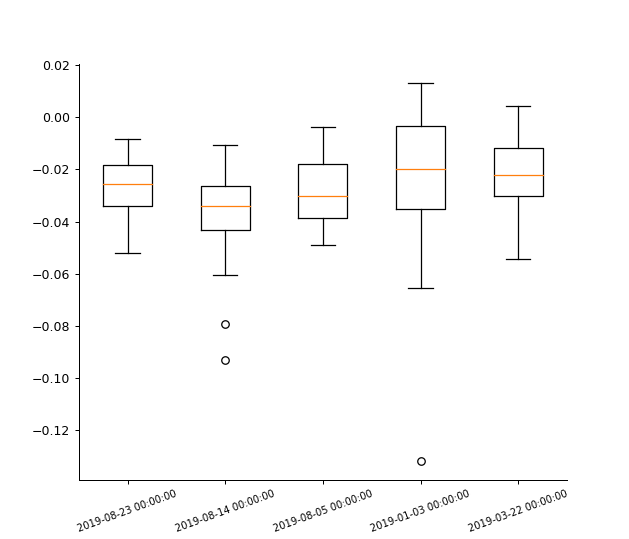

In [223]:
fig, ax = plt.subplots(1,1, figsize=(7,6))
ax.boxplot(alt_ret19.loc[worst_dates_sp19.index, :])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(worst_dates_sp19.index)
ax.tick_params(axis="x", labelsize=8, rotation=20)
ax.set
plt.show()

### sample symbols for alternative portfolio

In [ ]:
random.sample(alt_symbols)